# Introduction

The aim of this data science project is to analyze and predict house prices in Melbourne city. As one of the largest urban areas in Australia, understanding the factors influencing property prices can provide valuable insights for homebuyers, real estate professionals, and investors.
By leveraging a dataset containing information on Melbourne's housing market, including geographical coordinates and corresponding prices, we will explore the relationship between location and property prices. The project will employ various data analysis and machine learning techniques to develop a predictive model that can estimate prices based on given coordinates.
Through this analysis, we seek to uncover patterns and trends that contribute to property pricing variations across different neighborhoods within Melbourne. This knowledge will aid in decision-making processes related to buying, selling, or investing in real estate.
The subsequent sections will detail the data acquisition process, exploratory data analysis, model development, evaluation metrics, and conclusions drawn from the findings. By the end of this project, we aim to provide actionable insights into Melbourne's housing market and demonstrate the effectiveness of using geographic coordinates to estimate property prices.

# Importing Libraries

In [80]:
import pandas as pd  # Data manipulation and analysis
import matplotlib.pyplot as plt # data visualization
import seaborn as sns  # Advanced data visualization
from category_encoders import OneHotEncoder  # Encoding categorical variables
from IPython.display import VimeoVideo  # Displaying Vimeo videos in Jupyter Notebook
from ipywidgets import Dropdown, FloatSlider, IntSlider, interact  # Interactive widgets for Jupyter Notebook
from sklearn.impute import SimpleImputer  # Handling missing values
from sklearn.linear_model import LinearRegression, Ridge  # Linear regression models
from sklearn.metrics import mean_absolute_error  # Mean absolute error metric
from sklearn.pipeline import make_pipeline  # Creating data processing and modeling pipelines

## Reading Melbourne Property Data

In [83]:
df = pd.read_csv("melb_data.csv")
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


# Exploratory data analysis

In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         13580 non-null  object 
 1   Address        13580 non-null  object 
 2   Rooms          13580 non-null  int64  
 3   Type           13580 non-null  object 
 4   Price          13580 non-null  float64
 5   Method         13580 non-null  object 
 6   SellerG        13580 non-null  object 
 7   Date           13580 non-null  object 
 8   Distance       13580 non-null  float64
 9   Postcode       13580 non-null  float64
 10  Bedroom2       13580 non-null  float64
 11  Bathroom       13580 non-null  float64
 12  Car            13518 non-null  float64
 13  Landsize       13580 non-null  float64
 14  BuildingArea   7130 non-null   float64
 15  YearBuilt      8205 non-null   float64
 16  CouncilArea    12211 non-null  object 
 17  Lattitude      13580 non-null  float64
 18  Longti

In [85]:
# exploring null values
df.isnull().sum()/len(df)

Suburb           0.000000
Address          0.000000
Rooms            0.000000
Type             0.000000
Price            0.000000
Method           0.000000
SellerG          0.000000
Date             0.000000
Distance         0.000000
Postcode         0.000000
Bedroom2         0.000000
Bathroom         0.000000
Car              0.004566
Landsize         0.000000
BuildingArea     0.474963
YearBuilt        0.395803
CouncilArea      0.100810
Lattitude        0.000000
Longtitude       0.000000
Regionname       0.000000
Propertycount    0.000000
dtype: float64

In [86]:
# I will perform feature selection and remove the columns "council area," "car," and "year built" from the dataset as they are deemed irrelevant for the current analysis.
df.drop(columns=["CouncilArea", "YearBuilt", "Car"], inplace=True)    

In [87]:
df.select_dtypes("object").nunique()

Suburb          314
Address       13378
Type              3
Method            5
SellerG         268
Date             58
Regionname        8
dtype: int64

In [88]:
#drop low and high cadinality categorical variables
df.drop(columns=["Address", "Type", "SellerG", "Date"], inplace=True)

In [89]:
df.select_dtypes("object").nunique()

Suburb        314
Method          5
Regionname      8
dtype: int64

In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         13580 non-null  object 
 1   Rooms          13580 non-null  int64  
 2   Price          13580 non-null  float64
 3   Method         13580 non-null  object 
 4   Distance       13580 non-null  float64
 5   Postcode       13580 non-null  float64
 6   Bedroom2       13580 non-null  float64
 7   Bathroom       13580 non-null  float64
 8   Landsize       13580 non-null  float64
 9   BuildingArea   7130 non-null   float64
 10  Lattitude      13580 non-null  float64
 11  Longtitude     13580 non-null  float64
 12  Regionname     13580 non-null  object 
 13  Propertycount  13580 non-null  float64
dtypes: float64(10), int64(1), object(3)
memory usage: 1.5+ MB


In [91]:
# leaky data
df.drop(columns=["Propertycount", "Landsize"], inplace=True)

In [92]:
#Extra details
df.drop(columns=["Bedroom2", "Bathroom", "Postcode", "Distance", "Rooms"], inplace=True)

In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Suburb        13580 non-null  object 
 1   Price         13580 non-null  float64
 2   Method        13580 non-null  object 
 3   BuildingArea  7130 non-null   float64
 4   Lattitude     13580 non-null  float64
 5   Longtitude    13580 non-null  float64
 6   Regionname    13580 non-null  object 
dtypes: float64(4), object(3)
memory usage: 742.8+ KB


# Variable Identification and Exploration

In [94]:
formatted_df = df[["Price", "BuildingArea"]].describe().applymap("{0:,.0f}".format)
print(formatted_df)

           Price BuildingArea
count     13,580        7,130
mean   1,075,684          152
std      639,311          541
min       85,000            0
25%      650,000           93
50%      903,000          126
75%    1,330,000          174
max    9,000,000       44,515


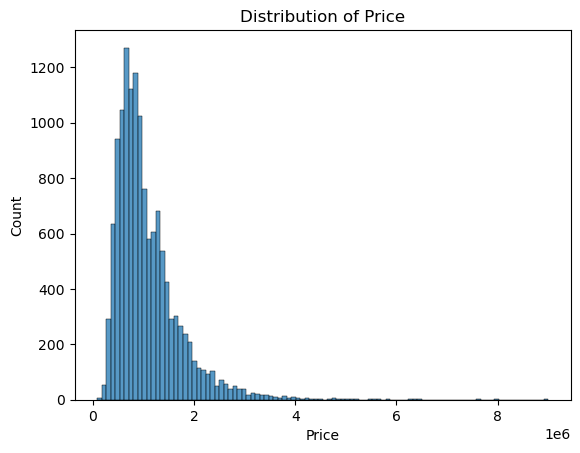

In [101]:
# distribution of price
sns.histplot(data=df, x="Price", bins=100)
plt.title("Distribution of Price")
plt.xlabel("Price")
plt.ylabel("Count")
plt.show();

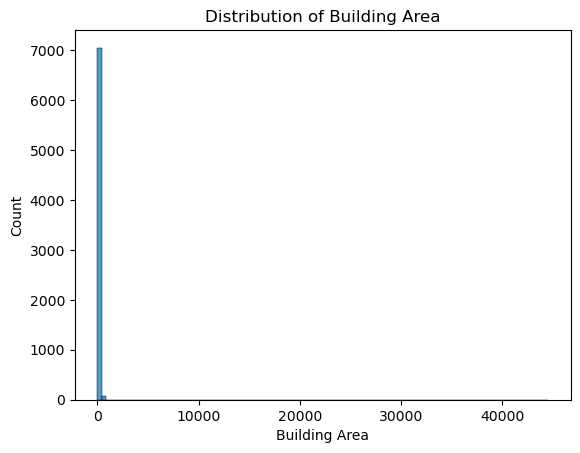

In [103]:
# distribution of building area
sns.histplot(data=df, x="BuildingArea", bins=100)
plt.title("Distribution of Building Area")
plt.xlabel("Building Area")
plt.ylabel("Count")
plt.show()

In [104]:
#Removing outliers
low, high = df["Price"].quantile([0.1, 0.9])
mask_price = df["Price"].between(low, high)
df = df[mask_price]

low, high = df["BuildingArea"].quantile([0.1, 0.9])
mask_area = df["BuildingArea"].between(low, high)
df = df[mask_area]

## After Removing Outliers

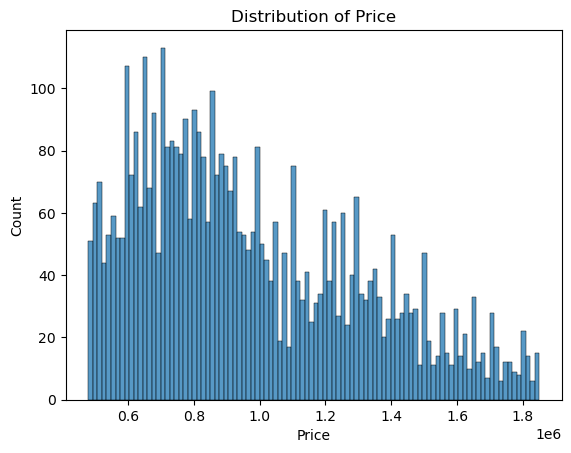

In [105]:
# distribution of price
sns.histplot(data=df, x="Price", bins=100)
plt.title("Distribution of Price")
plt.xlabel("Price")
plt.ylabel("Count")
plt.show();

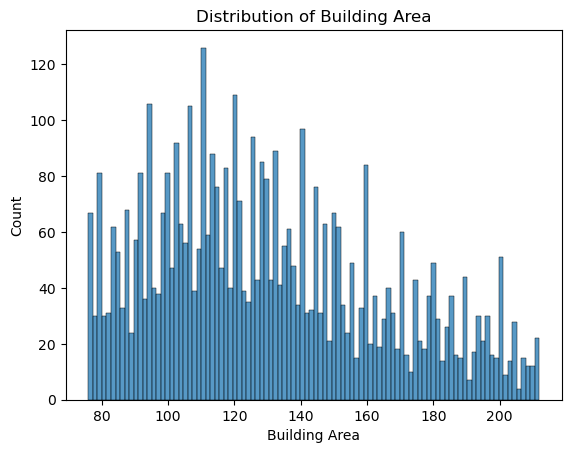

In [106]:
# distribution of Building area
sns.histplot(data=df, x="BuildingArea", bins=100)
plt.title("Distribution of Building Area")
plt.xlabel("Building Area")
plt.ylabel("Count")
plt.show()

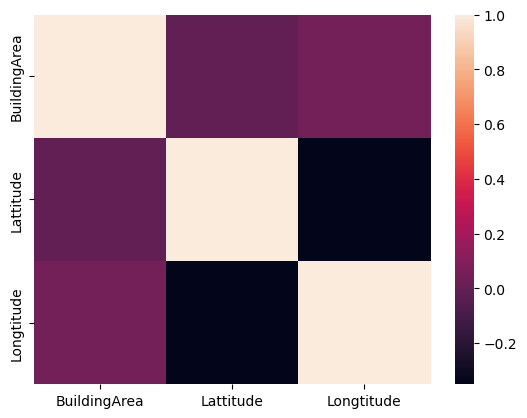

In [76]:
# Correlation Heatmap of Numerical Features (Excluding Price)
corr = df.select_dtypes("number").drop(columns="Price").corr()
sns.heatmap(corr);

# Feature and Target Selection

In [77]:
#assigning features and target
target = "Price"
features = ["BuildingArea", "Lattitude", "Longtitude", "Suburb"]
X_train = df[features]
y_train = df[target]

In [78]:
#mean absolute error
y_mean = y_train.mean()
y_pred_baseline = [y_mean]*len(y_train)
print("Mean apt price:", round(y_mean, 2))
print("Baseline MAE:", mean_absolute_error(y_train, y_pred_baseline))

Mean apt price: 974981.44
Baseline MAE: 281667.26179209084


# Modeling

In [54]:
# model fitting
model = make_pipeline(
    OneHotEncoder(use_cat_names=True),
    SimpleImputer(),
    Ridge()
)

model.fit(X_train, y_train)

Pipeline(steps=[('onehotencoder',
                 OneHotEncoder(cols=['Suburb'], use_cat_names=True)),
                ('simpleimputer', SimpleImputer()), ('ridge', Ridge())])

In [55]:
# model MAE
y_pred_training = model.predict(X_train)
print("Training MAE:", mean_absolute_error(y_train, y_pred_training))

Training MAE: 171663.57078891344


In [56]:
# function
def make_prediction(area, lat, lon, suburb):
    data ={
        "BuildingArea": area,
        "Lattitude": lat,
        "Longtitude": lon,
        "Suburb": suburb
    }
    df=pd.DataFrame(data, index=[0])
    prediction = model.predict(df).round(2)[0]
    return f"Predicted apartment price: ${prediction}"

# Interactive Model

In [57]:
interact(
    make_prediction,
    area=IntSlider(
        min=X_train["BuildingArea"].min(),
        max=X_train["BuildingArea"].max(),
        value=X_train["BuildingArea"].mean(),
    ),
    lat=FloatSlider(
        min=X_train["Lattitude"].min(),
        max=X_train["Lattitude"].max(),
        step=0.01,
        value=X_train["Lattitude"].mean(),
    ),
    lon=FloatSlider(
        min=X_train["Longtitude"].min(),
        max=X_train["Longtitude"].max(),
        step=0.01,
        value=X_train["Longtitude"].mean(),
    ),
    suburb=Dropdown(options=sorted(X_train["Suburb"].unique())),
);

interactive(children=(IntSlider(value=130, description='area', max=212, min=76), FloatSlider(value=-37.8048472…

# Conclusion: Analysis and Predictive Insights

Based on the interactive model, we can conclude that the predicted property prices are influenced by the chosen parameters: building area, latitude, longitude, and suburb. The model allows users to explore the impact of different input values on the predicted price, providing valuable insights for decision-making in the real estate market. The model's performance and accuracy should be assessed using appropriate evaluation metrics, and further analysis can be conducted to identify additional factors contributing to property prices.